# LandCoverNet
> https://mlhub.earth/datasets?search=landcovernet
* input: Sentinel 1, Sentinel 2, Landsat 8
* task: land-cover classification (7 types)
> Water (permanent), Artificial, Natural, Snow/Ice (Permanent), Woody, Cultivated, Natural
* time series to point (pixel-wise)
* regions available (global): Australia, Europe, South America, North America /  Africa, Asia
* 10m label and input data resolution (spatially aligned)

In [1]:
folder_ = "/ds/images/AI4EO/multi/landcovernet/"


In [2]:
import os
from tqdm import tqdm
import pandas as pd
from src.core.image_read import LandCoverBuilder

LC_build = LandCoverBuilder(f"{folder_}/ref_landcovernet_eu_v1")
LC_build.label_to_name, LC_build.view_names, len(LC_build)

({0: 'No Data',
  1: 'Water',
  2: 'Artificial Bareground',
  3: 'Natural Bareground',
  4: 'Permanent Snow/Ice',
  5: 'Woody Vegetation',
  6: 'Cultivated Vegetation',
  7: '(Semi) Natural Vegetation'},
 ['sentinel_1', 'sentinel_2', 'landsat_8'],
 840)

## Metadata

In [5]:
region = "af"
L8_metadata_dates = pd.read_csv(f"./metadata/{region}/landsat_8_dates_overall.csv")
S2_metadata_dates = pd.read_csv(f"./metadata/{region}/sentinel_2_dates_overall.csv")
S1_metadata_dates = pd.read_csv(f"./metadata/{region}/sentinel_1_dates_overall.csv")

L8_metadata_dates

,patch_id,dates,year,month,day,full_name,full_path
0,28QDE_00,20180116,2018,1,16,ref_landcovernet_af_v1_source_landsat_8_28QDE_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
1,28QDE_00,20180201,2018,2,1,ref_landcovernet_af_v1_source_landsat_8_28QDE_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
2,28QDE_00,20180217,2018,2,17,ref_landcovernet_af_v1_source_landsat_8_28QDE_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
3,28QDE_00,20180305,2018,3,5,ref_landcovernet_af_v1_source_landsat_8_28QDE_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
4,28QDE_00,20180321,2018,3,21,ref_landcovernet_af_v1_source_landsat_8_28QDE_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
...,...,...,...,...,...,...,...
56522,38PKT_29,20181122,2018,11,22,ref_landcovernet_af_v1_source_landsat_8_38PKT_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
56523,38PKT_29,20181201,2018,12,1,ref_landcovernet_af_v1_source_landsat_8_38PKT_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
56524,38PKT_29,20181208,2018,12,8,ref_landcovernet_af_v1_source_landsat_8_38PKT_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...
56525,38PKT_29,20181217,2018,12,17,ref_landcovernet_af_v1_source_landsat_8_38PKT_...,/ds/images/AI4EO/multi/landcovernet/ref_landco...


# Labels distribution
General Analysis

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

folder_r = "./"
continent = "sa"
info_sum_f = pd.read_csv(f"{folder_r}/metadata/{continent}/region_label_freq.csv", index_col=0)
info_sum_f_rel = info_sum_f/(256*256) #average per region
info_sum_c = pd.read_csv(f"{folder_r}/metadata/{continent}/region_label_conf_avg.csv", index_col=0)

info_sum_f

,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,
19HGA_29,0,0,0,0,0,0,65536,0
19PEK_02,661,0,0,0,0,19849,361,44665
18GXU_01,502,9234,27056,0,263,5771,10698,12012
21LYD_17,2,0,37,0,0,17386,47534,577
19LCK_00,351,10825,4,432,0,35310,0,18614
...,...,...,...,...,...,...,...,...
19NHC_13,0,0,0,0,0,65511,0,25
19GGM_25,0,0,390,0,0,0,0,65146
19KFA_29,35,0,85,0,0,1248,63084,1084


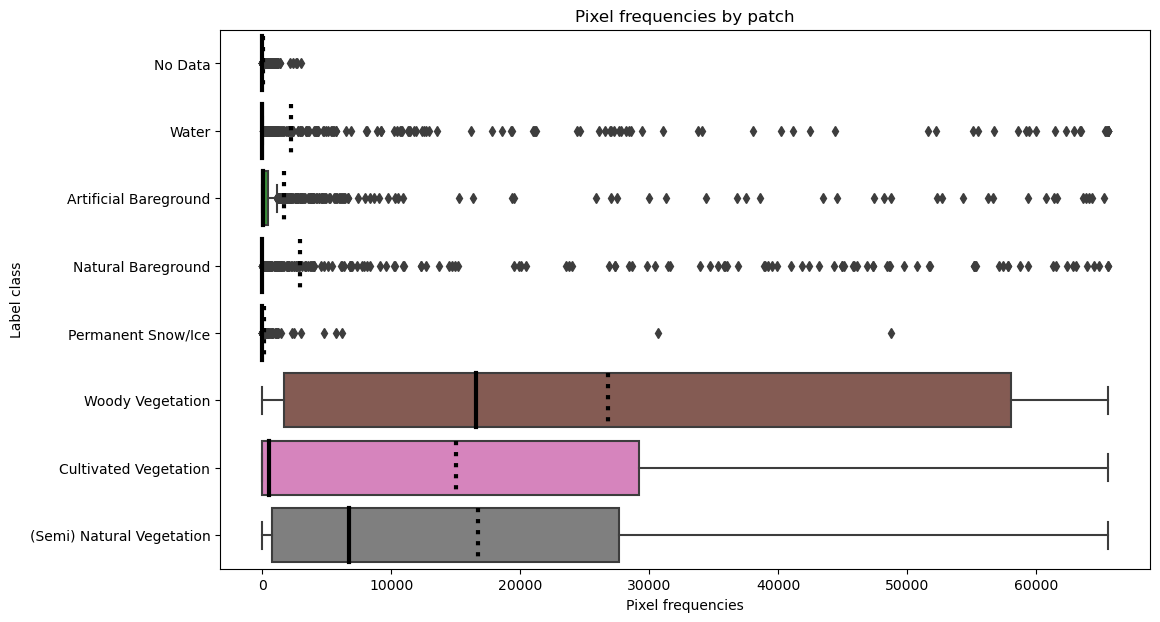

In [66]:
plt.figure(figsize=(12,7))
sns.boxplot(data=info_sum_f, orient="h", showmeans=True, meanline=True, meanprops={"lw":3, "c":"k","ls":"dotted"}, medianprops={"lw":3, "c":"k"})
plt.xlabel("Pixel frequencies")
plt.ylabel("Label class")
plt.title("Pixel frequencies by patch")
plt.show()

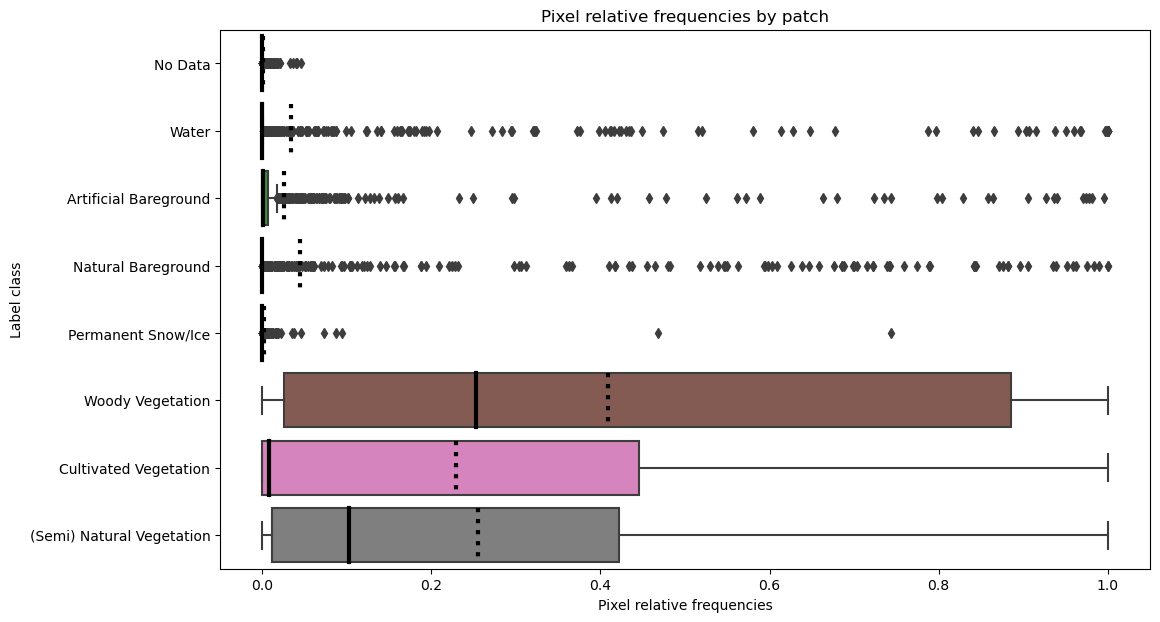

In [67]:
plt.figure(figsize=(12,7))
sns.boxplot(data=info_sum_f_rel, orient="h", showmeans=True, meanline=True, meanprops={"lw":3, "c":"k","ls":"dotted"}, medianprops={"lw":3, "c":"k"})
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies by patch")
plt.savefig(f"./imgs/{continent}_pixel_rel_freq.pdf")
plt.show()

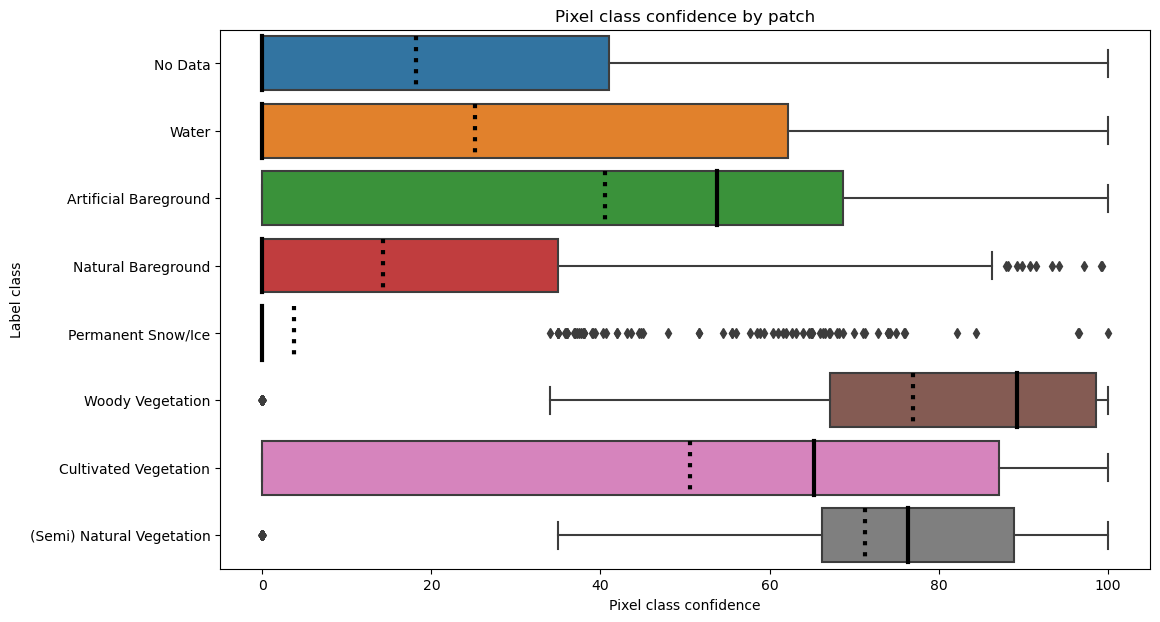

In [68]:
plt.figure(figsize=(12,7))
sns.boxplot(data=info_sum_c, orient="h", showmeans=True, meanline=True, meanprops={"lw":3, "c":"k","ls":"dotted"}, medianprops={"lw":3, "c":"k"})
plt.xlabel("Pixel class confidence")
plt.ylabel("Label class")
plt.title("Pixel class confidence by patch")
plt.savefig(f"./imgs/{continent}_pixel_conf.pdf")
plt.show()

## Building test set
> Test set creation based on different versions
1) completely random
2) stratify on labels frequency
3) uniform label distribution on testing set
4) uniform label distribution on training set
5) country selection

#### Random

In [36]:
from src.test_split.randomlike import random_selection
info_sum_f_rel_ext = random_selection(info_sum_f_rel, ratio=0.2)
info_sum_f_rel_ext

,test,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,,
28QDE_00,False,0.000000,0.0,0.000046,0.999954,0.0,0.000000,0.000000,0.000000
28QDE_01,True,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
28QDE_02,False,0.000000,0.0,0.003555,0.985962,0.0,0.000687,0.000000,0.009796
28QDE_03,True,0.000092,0.0,0.869385,0.037537,0.0,0.016953,0.040344,0.035690
28QDE_04,False,0.000061,0.0,0.009033,0.815384,0.0,0.013336,0.001144,0.161041
...,...,...,...,...,...,...,...,...,...
38PKT_25,False,0.033249,0.0,0.277588,0.648102,0.0,0.001785,0.000000,0.039276
38PKT_26,False,0.007904,0.0,0.066040,0.857040,0.0,0.000519,0.000000,0.068497
38PKT_27,True,0.035049,0.0,0.317108,0.374832,0.0,0.000290,0.014465,0.258255


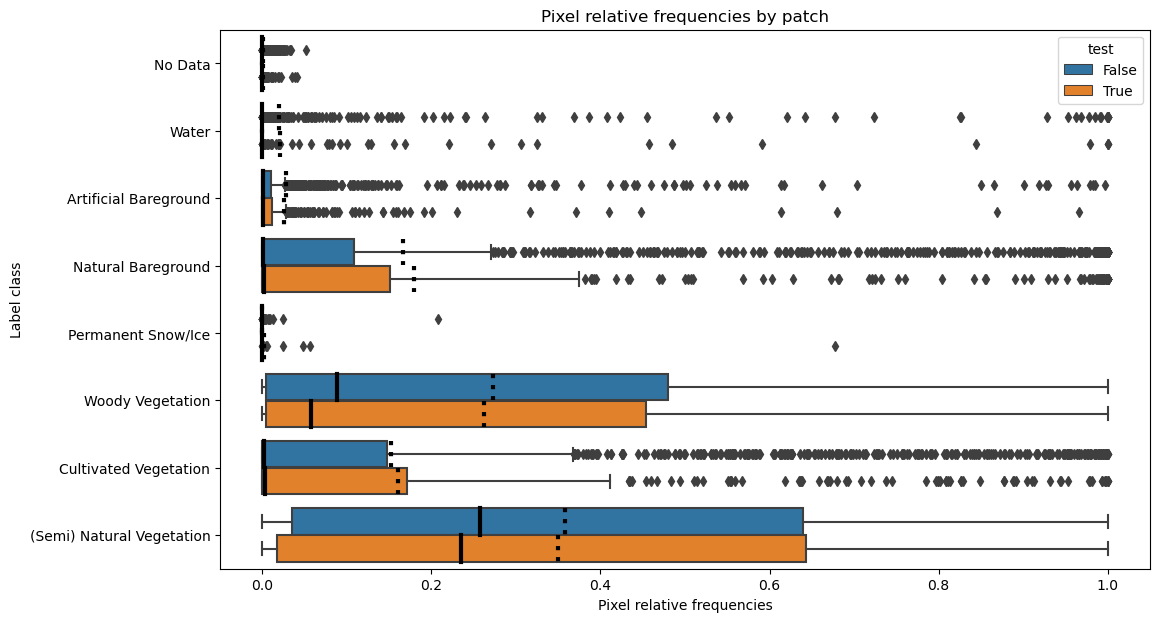

In [37]:
aux_plot = pd.melt(info_sum_f_rel_ext, value_vars=info_sum_f_rel.columns, ignore_index=False)
aux_plot = pd.merge(aux_plot,info_sum_f_rel_ext["test"], left_index=True,right_index=True)
plt.figure(figsize=(12,7))
sns.boxplot(data=aux_plot, orient="h", x="value",y="variable", hue="test",showmeans=True, meanline=True, meanprops={"lw":3, "c":"k","ls":"dotted"}, medianprops={"lw":3, "c":"k"})
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies by patch")
#plt.savefig(f"./imgs/{continent}_random")
plt.show()

#### Uniform-like

In [40]:
from src.test_split.uniformlike import uniform_dist_selection

info_sum_f_rel_ext = uniform_dist_selection(info_sum_f_rel, ratio=0.2, mode="test")
#info_sum_f_rel_ext = uniform_dist_selection(info_sum_f_rel, ratio=0.8, mode="train")
info_sum_f_rel_ext

,test,JS_div,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,,,
28QDE_00,True,0.704789,0.000000,0.0,0.000046,0.999954,0.0,0.000000,0.000000,0.000000
28QDE_01,True,0.704932,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
28QDE_02,False,0.685523,0.000000,0.0,0.003555,0.985962,0.0,0.000687,0.000000,0.009796
28QDE_03,False,0.588556,0.000092,0.0,0.869385,0.037537,0.0,0.016953,0.040344,0.035690
28QDE_04,False,0.607354,0.000061,0.0,0.009033,0.815384,0.0,0.013336,0.001144,0.161041
...,...,...,...,...,...,...,...,...,...,...
38PKT_25,False,0.553957,0.033249,0.0,0.277588,0.648102,0.0,0.001785,0.000000,0.039276
38PKT_26,False,0.604023,0.007904,0.0,0.066040,0.857040,0.0,0.000519,0.000000,0.068497
38PKT_27,False,0.483349,0.035049,0.0,0.317108,0.374832,0.0,0.000290,0.014465,0.258255


In [41]:
info_sum_f_rel_ext[info_sum_f_rel_ext["test"]]

,test,JS_div,No Data,Water,Artificial Bareground,Natural Bareground,Permanent Snow/Ice,Woody Vegetation,Cultivated Vegetation,(Semi) Natural Vegetation
identifier,,,,,,,,,,
28QDE_00,True,0.704789,0.000000,0.0,0.000046,0.999954,0.0,0.000000,0.000000,0.000000
28QDE_01,True,0.704932,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
28QDE_05,True,0.703503,0.000000,0.0,0.000000,0.999344,0.0,0.000000,0.000000,0.000656
28QDE_06,True,0.704932,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
28QDE_07,True,0.704932,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
38PKQ_08,True,0.691587,0.000000,0.0,0.000870,0.000000,0.0,0.008575,0.000183,0.990372
38PKQ_25,True,0.699810,0.000000,0.0,0.000046,0.002991,0.0,0.000015,0.000000,0.996948
38PKT_01,True,0.704932,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000


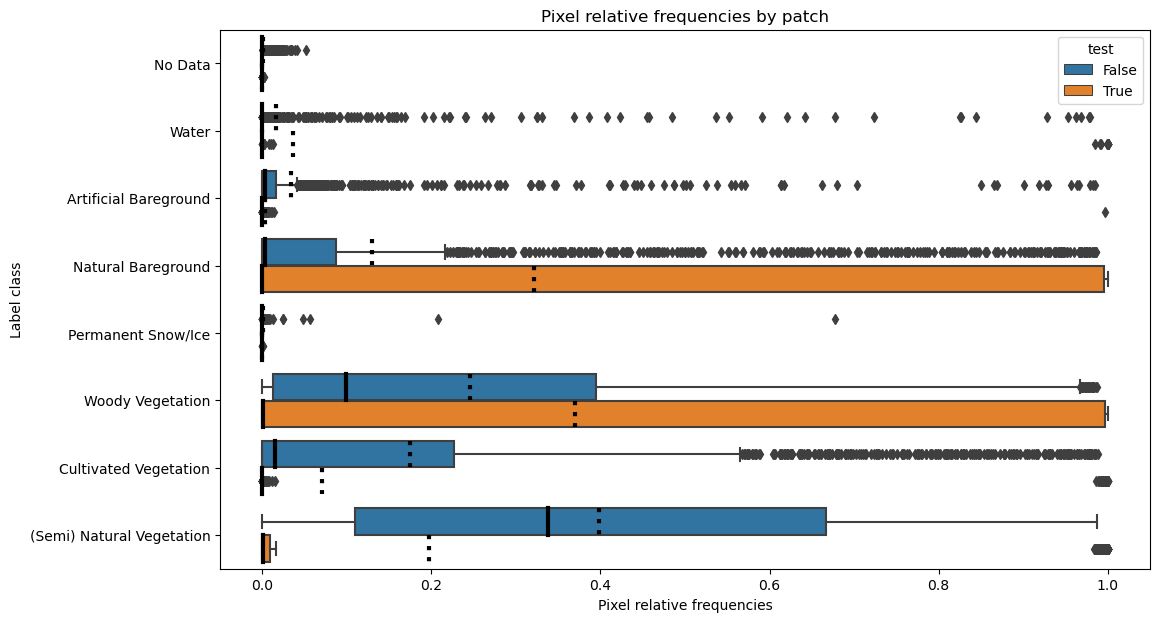

In [43]:
aux_plot = pd.melt(info_sum_f_rel_ext, value_vars=info_sum_f_rel.columns, ignore_index=False)
aux_plot = pd.merge(aux_plot,info_sum_f_rel_ext["test"], left_index=True,right_index=True)
plt.figure(figsize=(12,7))
sns.boxplot(data=aux_plot, orient="h", x="value",y="variable", hue="test", showmeans=True, meanline=True, meanprops={"lw":3, "c":"k","ls":"dotted"}, medianprops={"lw":3, "c":"k"})
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title("Pixel relative frequencies by patch")
plt.show()

#### Country-selections
> Select patches that belong to a specific country

In [46]:
from src.test_split.countries import countries_selection

info_countries = pd.read_csv(f"./metadata/{region}/info_countries.csv", index_col=0)

countries=["Germany"]

info_countries_ext = countries_selection(info_countries,countries=countries )
info_countries_ext = info_countries_ext[~info_countries_ext.index.duplicated(keep='first')]
info_countries_ext

,test,Region,Subregion,Country
level_0,,,,
28QDE_00,False,Africa,Western Africa,Mauritania
28QDE_01,False,Africa,Western Africa,Mauritania
28QDE_02,False,Africa,Western Africa,Mauritania
28QDE_03,False,Africa,Western Africa,Mauritania
28QDE_04,False,Africa,Western Africa,Mauritania
...,...,...,...,...
38PKT_25,False,Africa,Eastern Africa,Djibouti
38PKT_26,False,Africa,Eastern Africa,Ethiopia
38PKT_27,False,Africa,Eastern Africa,Djibouti


In [47]:
info_countries_ext[info_countries_ext["test"]]

,test,Region,Subregion,Country
level_0,,,,


In [48]:
aux_plot = pd.melt(info_countries_ext, value_vars=info_sum_f_rel.columns, ignore_index=False)
aux_plot = pd.merge(aux_plot,info_countries_ext["test"], left_index=True,right_index=True)
plt.figure(figsize=(12,7))
sns.boxplot(data=aux_plot, orient="h", x="value",y="variable", hue="test",showmeans=True, meanline=True, meanprops={"lw":3, "c":"k","ls":"dotted"}, medianprops={"lw":3, "c":"k"})
plt.xlabel("Pixel relative frequencies")
plt.ylabel("Label class")
plt.title(f"Pixel relative frequencies by patch (test={countries})")
plt.show()

KeyError: "The following 'value_vars' are not present in the DataFrame: ['(Semi) Natural Vegetation', 'Artificial Bareground', 'Cultivated Vegetation', 'Natural Bareground', 'No Data', 'Permanent Snow/Ice', 'Water', 'Woody Vegetation']"